# Intervallo di confidenza per la media (varianza nota)

Si vuole testare un dispositivo con uno strumento che fornice delle misure di voltaggio. <br>Si eseguono 9 misurazioni registrando i valori in volt 11, 13.2, 12.3, 10.9, 13, 10.5, 12.3, 13, 13.15.
E` nota la precisione dello strumento e si ha σ = 1 V.
- Si determinino gli intervalli di confidenza al 95% e al 99%.
- Determinare gli stessi intervalli di confidenza nel caso in cui si avesse σ = 1.4 V.
- Sempre con precisione σ = 1 V, determinare gli stessi intervalli con la stessa media delle misure ma supponendo che essa provenga da un campione di 20 misurazioni.

In [16]:
import numpy as np
from scipy.stats import norm, t, probplot, chi2
import matplotlib.pyplot as plt

### Punto 1

In [17]:
x = np.array([11, 13.2, 12.3, 10.9, 13, 10.5, 12.3, 13, 13.15])
n = x.size

media = np.mean(x) # media campionaria
print(f'Media: {media}\n')
dev_std = 1

alpha = 1-0.95
phi = norm.ppf(1-alpha/2) # sottointeseo 1 e 0 come media e deviazione
print(f'Phi: {phi}')

# PAG 40
left = media - dev_std/np.sqrt(n)*phi
right = media + dev_std/np.sqrt(n)*phi
print(f'Intervallo al 95% --> left: {left} - right: {right}\n') # Con una probabilità al 95% ricade qui

alpha = 1-0.99
phi = norm.ppf(1-alpha/2)
print(f'Phi: {phi}')

left = media - dev_std/np.sqrt(n)*phi
right = media + dev_std/np.sqrt(n)*phi
print(f'Intervallo al 99% --> left: {left} - right: {right}\n') # Con una probabilità al 95% ricade qui

Media: 12.15

Phi: 1.959963984540054
Intervallo al 95% --> left: 11.496678671819982 - right: 12.803321328180019

Phi: 2.5758293035489004
Intervallo al 99% --> left: 11.291390232150366 - right: 13.008609767849634



### Punto 2

In [18]:
dev_std = 1.4

alpha = 1-0.95
phi = norm.ppf(1-alpha/2)
print(f'Phi: {phi}')

left = media - dev_std/np.sqrt(n)*phi
right = media + dev_std/np.sqrt(n)*phi
print(f'Intervallo al 95% --> left: {left} - right: {right}\n') # Con una probabilità al 95% ricade qui

alpha = 1-0.99
phi = norm.ppf(1-alpha/2)
print(f'Phi: {phi}')

left = media - dev_std/np.sqrt(n)*phi
right = media + dev_std/np.sqrt(n)*phi
print(f'Intervallo al 99% --> left: {left} - right: {right}\n') # Con una probabilità al 95% ricade qui

Phi: 1.959963984540054
Intervallo al 95% --> left: 11.235350140547975 - right: 13.064649859452025

Phi: 2.5758293035489004
Intervallo al 99% --> left: 10.947946325010513 - right: 13.352053674989488



### Punto 3

In [19]:
dev_std = 1
n = 20

alpha = 1-0.95
phi = norm.ppf(1-alpha/2)
print(f'Phi: {phi}')

left = media - dev_std/np.sqrt(n)*phi
right = media + dev_std/np.sqrt(n)*phi
print(f'Intervallo al 95% --> left: {left} - right: {right}\n') # Con una probabilità al 95% ricade qui

alpha = 1-0.99
phi = norm.ppf(1-alpha/2)
print(f'Phi: {phi}')

left = media - dev_std/np.sqrt(n)*phi
right = media + dev_std/np.sqrt(n)*phi
print(f'Intervallo al 99% --> left: {left} - right: {right}\n') # Con una probabilità al 95% ricade qui

Phi: 1.959963984540054
Intervallo al 95% --> left: 11.71173872971171 - right: 12.58826127028829

Phi: 2.5758293035489004
Intervallo al 99% --> left: 11.574027057882873 - right: 12.725972942117128



# Intervallo di confidenza per la media (varianza ignota)

Viene effettuato un test di rottura di un certo materiale ottenendo i seguenti valori in megapascal (MPa).<br>
19.8 10.1 14.9 7.5 15.4 15.4 15.4 18.5 7.9 12.7 11.9 11.4 11.4 14.1 17.6 16.7 15.8 19.5 8.8 13.6 11.9 11.4

- Dopo aver verificato graficamente che il campione proviene da una popolazione distribuita approssimativamente in modo normale, determinare l’intervallo di confidenza al 95% per la media.

Media campionaria: 13.713636363636363
Deviazione standard campionaria: 3.553575724942475


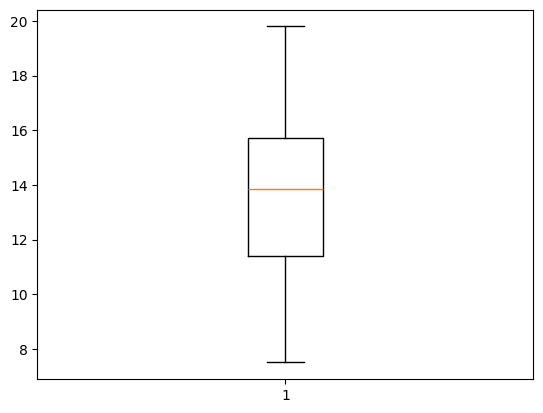

In [20]:
x = np.array([19.8, 10.1, 14.9, 7.5, 15.4, 15.4, 15.4, 18.5, 7.9, 12.7, 11.9, 
              11.4, 11.4, 14.1, 17.6, 16.7, 15.8, 19.5, 8.8, 13.6, 11.9, 11.4])

media = np.mean(x)
print(f'Media campionaria: {media}')

# Calcolo S_quadro (stimatore non distorto) poichè non è nota la varianza
S = np.std(x, ddof=1)
print(f'Deviazione standard campionaria: {S}')

plt.boxplot(x)
plt.show()

### Punto 2

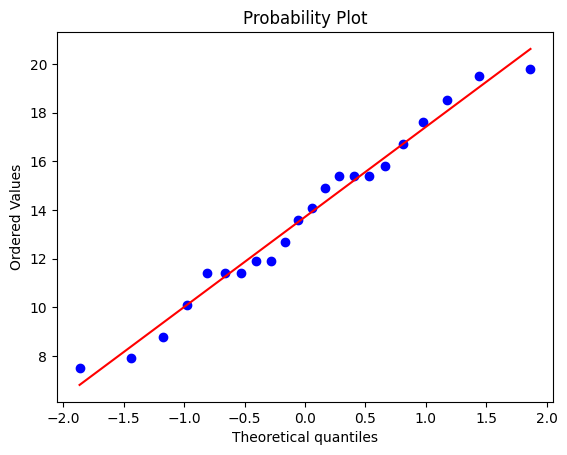

T: 2.079613844727662
Intervallo al 95% --> left: 12.138069152904343 - right: 15.289203574368383



In [21]:
# Verifico che segue una normale 
fig, ax= plt.subplots(1,1)
probplot(x, dist=norm, plot=ax)
plt.show()

# Si può assumere la distribuzione della popolazione approssimativamente normale
n = x.size

alpha = 1-0.95
T = t.ppf(1-alpha/2, n-1) # n-1 = gradi di libertà
print(f'T: {T}')

# PAG 42
left = media - S/np.sqrt(n)*T
right = media + S/np.sqrt(n)*T
print(f'Intervallo al 95% --> left: {left} - right: {right}\n') # Con una probabilità al 95% ricade qui

# Esercizi sull'intervallo di confidenza per la varianza

Un macchinario riempie automaticamente delle bottiglie. Da un campione di 20 misurazioni si ottengono i seguenti valori (in litri):<br> 2.05, 2.04, 1.98, 1.96, 2.03, 2.01, 1.97, 1.99, 2.01, 2.05 1.96, 1.95, 2.04, 2.01, 1.97, 1.96, 2.02, 2.04, 1.98, 1.94<br>
Se la varianza fosse troppo grande, la proporzione di bottiglie sotto o sovrariempite sarebbe non accettabile.
- Calcolare l’intervallo di confidenza al 95% per il limite superiore per la deviazione standard.

In [27]:
x = np.array([2.05, 2.04, 1.98, 1.96, 2.03, 2.01, 1.97, 1.99, 2.01, 2.05, 1.96, 1.95, 2.04, 2.01, 1.97, 1.96, 2.02, 2.04, 1.98, 1.94])
n = x.size

alpha = 0.05

S = np.std(x, ddof=1)
S2 = S**2
print(f'Deviazione standard campionaria: {S:.3f}')

# PAG 45
chi = chi2.ppf(1-alpha, n-1)
sig2 = S2 * (n-1) / chi
upper_limit = np.sqrt(sig2)

print(f'Limite superiore: {upper_limit:.3f}')
print(f'Varianza campionaria: {S2:.3f}')

cond = S2 <= upper_limit
print("La proporzione delle bottiglie è accettabile" if cond else "La proporzione delle bottiglie non è accettabile")

# Dato che la varianza non supera il limite superiore dell'intervallo di confidenza 
# per la varianza la proporzione delle bottiglie è accettabile

Deviazione standard campionaria: 0.036
Limite superiore: 0.029
Varianza campionaria: 0.001
La proporzione delle bottiglie è accettabile
